In [ ]:
!pip install seaborn

In [7]:
import pandas as pd
import numpy as np
#Bibliotecas para gráficos
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [8]:
df = pd.read_csv("scouts_2015.csv")

print("Dimensão da base: ", df.shape)
df.head()

Dimensão da base:  (29720, 34)


,atleta_id,apelido,rodada_id,ano,clube_id,clube,posicao_id,posicao,jogos_num,pontos_num,...,FC,GC,CA,CV,SG,DD,DP,GS,status_id,status
0,87552,Vitor Bueno,27,2015,277,Santos,4,mei,1,0.0,...,0,0,0,0,0,0,0,0,0,NaN
1,87552,Vitor Bueno,28,2015,277,Santos,4,mei,1,0.0,...,0,0,0,0,0,0,0,0,0,NaN
2,87552,Vitor Bueno,29,2015,277,Santos,4,mei,1,0.0,...,0,0,0,0,0,0,0,0,0,NaN
3,87552,Vitor Bueno,30,2015,277,Santos,4,mei,1,0.0,...,0,0,0,0,0,0,0,0,0,NaN
4,87552,Vitor Bueno,31,2015,277,Santos,4,mei,2,-0.3,...,0,0,0,0,0,0,0,0,0,NaN


Como está estruturado o dataset?

In [5]:
print("Dimensão da base: ", df.shape)
df.head()

Dimensão da base:  (29720, 34)


,atleta_id,apelido,rodada_id,ano,clube_id,clube,posicao_id,posicao,jogos_num,pontos_num,...,FC,GC,CA,CV,SG,DD,DP,GS,status_id,status
0,87552,Vitor Bueno,27,2015,277,Santos,4,mei,1,0.0,...,0,0,0,0,0,0,0,0,0,NaN
1,87552,Vitor Bueno,28,2015,277,Santos,4,mei,1,0.0,...,0,0,0,0,0,0,0,0,0,NaN
2,87552,Vitor Bueno,29,2015,277,Santos,4,mei,1,0.0,...,0,0,0,0,0,0,0,0,0,NaN
3,87552,Vitor Bueno,30,2015,277,Santos,4,mei,1,0.0,...,0,0,0,0,0,0,0,0,0,NaN
4,87552,Vitor Bueno,31,2015,277,Santos,4,mei,2,-0.3,...,0,0,0,0,0,0,0,0,0,NaN


Quantos jogadores e rodadas temos registrados?

In [14]:
len(df['apelido'].unique())

872

In [15]:
len(df['rodada_id'].unique())

36

Quais variáveis são categóricas e quais são numéricas?


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29720 entries, 0 to 29719
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   atleta_id           29720 non-null  int64  
 1   apelido             29720 non-null  object 
 2   rodada_id           29720 non-null  int64  
 3   ano                 29720 non-null  int64  
 4   clube_id            29720 non-null  int64  
 5   clube               29720 non-null  object 
 6   posicao_id          29720 non-null  int64  
 7   posicao             29720 non-null  object 
 8   jogos_num           29720 non-null  int64  
 9   pontos_num          29720 non-null  float64
 10  media_num           29720 non-null  float64
 11  preco_num_anterior  29720 non-null  float64
 12  preco_num           29720 non-null  float64
 13  variacao_num        29720 non-null  float64
 14  FS                  29720 non-null  int64  
 15  PE                  29720 non-null  int64  
 16  A   

Qual é a pontuação média dos jogadores em uma rodada?

In [31]:
df.describe().pontos_num['mean']

np.float64(0.9490753701211304)

In [ ]:
df[df['atleta_id'] == 87552]['pontos_num']

np.float64(0.0)

Qual posição tem a maior mediana de pontos?

In [26]:
array = df['posicao'].unique()

for i in array:
    mediana = np.median(df[df['posicao'] == i]['pontos_num'])
    print(i, mediana)


mei 0.0
lat 0.0
ata 0.0
gol 0.0
zag 0.0
tec 2.88


Existe um jogador que aparece como “moda” em gols ou assistências (ou seja, que repete muito em valores)?

In [95]:
jogadores = df['atleta_id'].unique()


moda = st.mode(jogadores)
nome = df[df['atleta_id'] == moda[0]]['apelido'].tolist()[0]
print(nome, moda[0])


Dida 36443


A pontuação dos atacantes é mais dispersa que a dos zagueiros?

In [23]:
zag = df[df['posicao'] == 'zag']['pontos_num']
dpZag = zag.std()
ata = df[df['posicao'] == 'ata']['pontos_num']
dpAta = ata.std()
print(f"Zagueiro: {dpZag:.2f}, Atacante: {dpAta:.2f}")

Zagueiro: 2.64, Atacante: 3.12


Qual posição tem maior consistência de desempenho (menor desvio-padrão de pontos)?

In [ ]:
for i in array:
    std = np.std(df[df['posicao'] == i]['pontos_num'],ddof=1)
    print(i, std)


mei 2.387969932698315
lat 2.7713292819222493
ata 3.120258703069242
gol 3.077805581488195
zag 2.6406523797022445
tec 2.197947128703082


Como é a variabilidade no preço dos jogadores por posição?

In [28]:
for i in array:
    variabilidade = np.var(df[df['posicao'] == i]['preco_num'])
    print(i, variabilidade)

mei 21.07978403474441
lat 19.558114106398087
ata 30.15568383511771
gol 36.907234157330514
zag 19.221224391225714
tec 8.184456682649554


Como se distribuem os gols por jogador? A distribuição é simétrica ou enviesada?

Abuda 7.2
Adilson Batista 26.43
Adrianinho 6.6000000000000005
Adriano 35.8
Adryelson 0.0
Agenor 113.89999999999999
Aislan -0.7999999999999999
Alan 0.0
Alan Costa 30.6
Alan Kardec 19.999999999999996
Alan Patrick 104.2
Alan Ruschel 14.8
Alan Santos 15.299999999999999
Alberto Valentim 5.34
Alecsandro 44.3
Alef 4.1
Alemão 2.6
Alessandro 0.0
Alex 170.4
Alex Alves 32.800000000000004
Alex Santana 0.1
Alex Silva 0.0
Alexandre Cajuru 0.0
Alexandre Pato 157.8
Alexandro 17.799999999999997
Alison 0.6
Alisson 56.9
Alisson Becker 100.9
Alisson Farias 4.0
Allano 39.9
Allione 12.5
Almir 5.3
Amaral 9.3
Ananias 81.1
Anderson 44.4
Anderson Lopes 60.2
Anderson Pico 4.8
Anderson Salles 24.0
Andrei Girotto 16.0
Andrezinho 51.7
Andrigo -1.8
André 143.4
André Baumer 0.0
André Lima 100.2
André Luís 0.0
André Paulino 0.0
Anselmo 89.2
Antônio Carlos 80.9
Apodi 130.8
Arancibia 0.0
Aranha 0.0
Araújo 2.8
Argel Fucks 114.28999999999999
Ariel Cabral 36.4
Armero 11.3
Arnaldo 14.1
Arouca 30.4
Arthur -4.6
Arthur Maia 0.

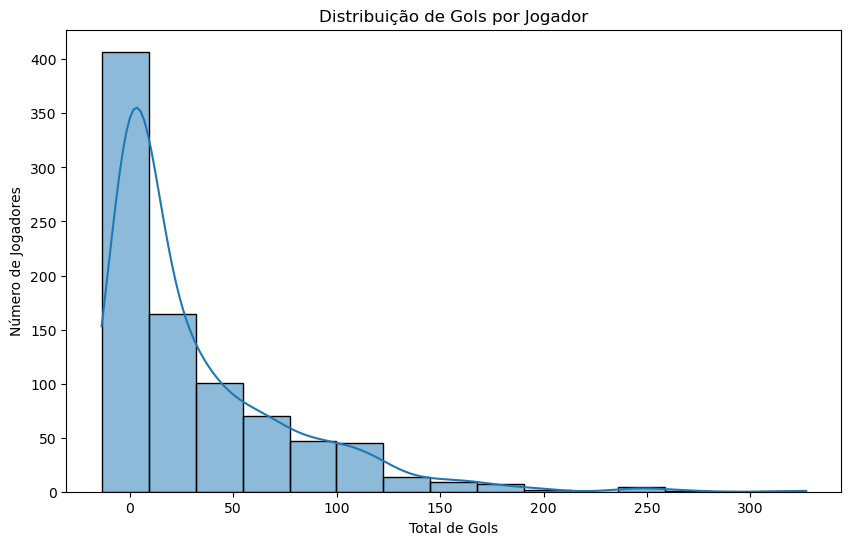

Média: 32.35
Mediana: 12.55
Assimetria (Skewness): 2.02
A distribuição é assimétrica à direita (positivamente enviesada).


In [ ]:
from scipy.stats import skew

gols_por_jogador = df.groupby('apelido')['pontos_num'].sum()

for jogador, total in gols_por_jogador.items():
    print(jogador, total)

plt.figure(figsize=(10,6))
sns.histplot(gols_por_jogador, bins=15, kde=True)
plt.title('Distribuição de Gols por Jogador')
plt.xlabel('Total de Gols')
plt.ylabel('Número de Jogadores')
plt.show()

media = gols_por_jogador.mean()
mediana = gols_por_jogador.median()
assimetria = skew(gols_por_jogador)

print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Assimetria (Skewness): {assimetria:.2f}")

if np.isclose(assimetria, 0, atol=0.5):
    print("A distribuição é aproximadamente simétrica.")
elif assimetria > 0:
    print("A distribuição é assimétrica à direita (positivamente enviesada).")
else:
    print("A distribuição é assimétrica à esquerda (negativamente enviesada).")


Existe uma concentração de pontuações em torno de zero (indicando rodadas ruins)?

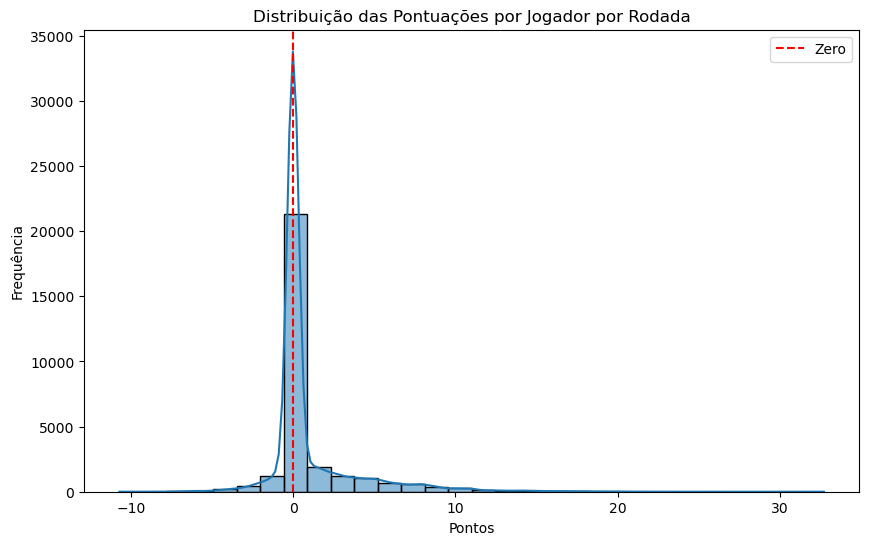

Média: 0.95
Mediana: 0.00
Assimetria (Skewness): 2.85
74.68% das pontuações estão entre -1 e 1 ponto.


In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['pontos_num'], bins=30, kde=True)
plt.title('Distribuição das Pontuações por Jogador por Rodada')
plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.axvline(0, color='red', linestyle='--', label='Zero')
plt.legend()
plt.show()

media = df['pontos_num'].mean()
mediana = df['pontos_num'].median()
assimetria = skew(df['pontos_num'])

print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Assimetria (Skewness): {assimetria:.2f}")

num_proximos_de_zero = df[(df['pontos_num'] >= -1) & (df['pontos_num'] <= 1)].shape[0]
total = df.shape[0]
porcentagem = (num_proximos_de_zero / total) * 100

print(f"{porcentagem:.2f}% das pontuações estão entre -1 e 1 ponto.")

O preço dos jogadores segue uma distribuição próxima da normal?

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro

# Plotar histograma com KDE para o preço dos jogadores
plt.figure(figsize=(10,6))
sns.histplot(df['preco'], bins=30, kde=True)
plt.title('Distribuição do Preço dos Jogadores')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# Calcular medidas estatísticas
assimetria = skew(df['preco'])
curtose = kurtosis(df['preco'])
print(f"Assimetria (Skewness): {assimetria:.2f}")
print(f"Curtose: {curtose:.2f}")

# Teste de normalidade de Shapiro-Wilk (recomendado para n < 5000)
stat, p = shapiro(df['preco'])
print(f"Shapiro-Wilk Teste: estatística={stat:.3f}, p-valor={p:.3f}")

if p > 0.05:
    print("Não rejeitamos a hipótese nula: os dados podem ser normalmente distribuídos.")
else:
    print("Rejeitamos a hipótese nula: os dados provavelmente não são normalmente distribuídos.")


# Plotar histograma com KDE para o preço dos jogadores
plt.figure(figsize=(10,6))
sns.histplot(df['preco'], bins=30, kde=True)
plt.title('Distribuição do Preço dos Jogadores')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# Calcular medidas estatísticas
assimetria = skew(df['preco'])
curtose = kurtosis(df['preco'])
print(f"Assimetria (Skewness): {assimetria:.2f}")
print(f"Curtose: {curtose:.2f}")

# Teste de normalidade de Shapiro-Wilk (recomendado para n < 5000)
stat, p = shapiro(df['preco'])
print(f"Shapiro-Wilk Teste: estatística={stat:.3f}, p-valor={p:.3f}")

if p > 0.05:
    print("Não rejeitamos a hipótese nula: os dados podem ser normalmente distribuídos.")
else:
    print("Rejeitamos a hipótese nula: os dados provavelmente não são normalmente distribuídos.")


# Plotar histograma com KDE para o preço dos jogadores
plt.figure(figsize=(10,6))
sns.histplot(df['preco'], bins=30, kde=True)
plt.title('Distribuição do Preço dos Jogadores')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# Calcular medidas estatísticas
assimetria = skew(df['preco'])
curtose = kurtosis(df['preco'])
print(f"Assimetria (Skewness): {assimetria:.2f}")
print(f"Curtose: {curtose:.2f}")

# Teste de normalidade de Shapiro-Wilk (recomendado para n < 5000)
stat, p = shapiro(df['preco'])
print(f"Shapiro-Wilk Teste: estatística={stat:.3f}, p-valor={p:.3f}")

if p > 0.05:
    print("Não rejeitamos a hipótese nula: os dados podem ser normalmente distribuídos.")
else:
    print("Rejeitamos a hipótese nula: os dados provavelmente não são normalmente distribuídos.")


KeyError: 'preco'

<Figure size 1000x600 with 0 Axes>